In [121]:
!pip install wordcloud

In [122]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud

In [123]:
df = pd.read_csv('food_coded.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.shape

(125, 61)

In [186]:
df.head(5)

,GPA,gender,breakfast_pic,calories_chicken,calories_importance,calories_scone,coffee_pic,comfort_food,comfort_food_reasons_coded,cook,cuisine,diet_current_coded,drink_pic,eating_changes_coded,eating_changes_specified,eating_out_weekly,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine_coded,fav_food_origin,fav_food_childhood,fries_pic,fruit_day,grade,greek_food,healthy_feeling,healthy_meal,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,serve_friend_meal,mother_education,mother_profession,nutritional_check,living_situation,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup_pic,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,1.0,315,1,none,9,4,1,2,1,1,1,3,3,1,5,5,profesor,3,1,rice and chicken,2,5,2,5,2,looks not oily,8,5,5,5,1,1,"rice, chicken, soup",1,unemployed,5,1,5,2,5,3,1,1,1,1165,345,car racing,5,1,1315,187.00000
1,3.654,1,1,610,3.0,420,2,"chocolate, chips, ice cream",1,3,1,1,2,1,2,2,2,4,5,2,Self employed,1,1,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",3,4,4,4,1,2,"Pasta, steak, chicken",4,Nurse RN,4,1,5,4,4,3,1,1,2,725,690,Basketball,4,2,900,155.00000
2,3.300,1,1,720,4.0,420,2,"frozen yogurt, pizza, fast food",1,5,3,3,1,1,3,2,3,5,4,2,owns business,1,3,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,6,6,5,5,7,2,"chicken and rice with veggies, pasta, some kin...",2,owns business,4,2,5,3,5,6,1,2,5,1165,500,none,5,1,900,159.04918
3,3.200,1,1,430,3.0,420,2,"Pizza, Mac and cheese, ice cream",2,4,2,1,2,1,3,2,3,5,3,2,Mechanic,3,1,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats",2,6,5,5,2,2,Grilled chicken \rStuffed Shells\rHomemade Chili,4,Special Education Teacher,2,1,5,2,5,5,1,2,5,725,690,none,3,1,1315,240.00000
4,3.500,1,1,720,2.0,420,2,"Ice cream, chocolate, chips",1,5,2,1,2,3,4,2,2,4,5,4,IT,1,3,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",2,6,2,5,1,1,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5,Substance Abuse Conselor,3,1,5,4,2,4,1,1,4,940,500,Softball,4,2,760,190.00000


df.isnull().sum()

### Data Cleaning

In [125]:
df.rename(columns = {
    'Gender': 'gender',
    'breakfast': 'breakfast_pic',
    'coffee': 'coffee_pic',
    'calories_day': 'calories_importance',
    'diet_current': 'diet',
    'drink': 'drink_pic',
    'eating_changes_coded1': 'eating_changes_specified',
    'eating_out': 'eating_out_weekly',
    'fav_food': 'fav_food_origin',
    'food_childhood': 'fav_food_childhood',
    'fries': 'fries_pic',
    'grade_level': 'grade',
    'meals_dinner_friend': 'serve_friend_meal',
    'on_off_campus': 'living_situation',
    'soup': 'soup_pic',
},
    inplace=True
)

In [126]:
(df.isnull().sum(axis=1) > 0).sum()

73

In [127]:
df['GPA'].unique()
df.replace({'GPA': '3.79 bitch'}, '3.79', inplace=True)
df.replace({'GPA': '[a-zA-Z]'}, np.nan, inplace=True, regex=True)
df['GPA'] = pd.to_numeric(df['GPA'])
df['GPA'].describe()
df.replace({'GPA': np.nan}, df['GPA'].mean(), inplace=True)

In [128]:
df['calories_importance'].unique()
df.replace({'calories_importance': np.nan}, 1, inplace=True)

In [129]:
df['calories_scone'].unique()
df['calories_scone'].describe()
df.replace({'calories_scone': np.nan}, 420, inplace=True)
df['calories_scone'] = df['calories_scone'].astype(int)

In [130]:
df['comfort_food_reasons_coded'].unique()
df.replace({'comfort_food_reasons_coded': np.nan}, {'comfort_food_reasons_coded': df['comfort_food_reasons_coded'].mode()[0]}, inplace = True)
df['comfort_food_reasons_coded'] = df['comfort_food_reasons_coded'].astype(int)

In [131]:
df['cook'].unique()
df['cook'].describe()
df.replace({'cook': np.nan}, {'cook': df['cook'].median()}, inplace = True)
df.replace({'cook': [1, 2, 3, 4, 5]}, {'cook': [5, 4, 3, 2, 1]}, inplace = True)
df['cook'] = df['cook'].astype(int)

In [132]:
df['cuisine'].unique()
df['cuisine'].value_counts()
df['cuisine'] = df['cuisine'].fillna(df['cuisine'].mode()[0])
df['cuisine'] = df['cuisine'].astype(int)

In [133]:
df.replace({'diet_current_coded': [1, 2]}, {'diet_current_coded': [2, 1]}, inplace = True)

In [134]:
df['drink_pic'].unique()
df['drink_pic'] = df['drink_pic'].fillna(df['drink_pic'].mode()[0])
df['drink_pic'] = df['drink_pic'].astype(int)

In [135]:
df['employment'].unique()
df['employment'] = df['employment'].fillna(df['employment'].mode()[0])
df['employment'] = df['employment'].astype(int)

In [136]:
df['exercise'].unique()
df.replace({'exercise': [1, 2, 3, 4, 5]}, {'exercise': [5, 4, 3, 2, 1]}, inplace = True)
df['exercise'] = df['exercise'].fillna(df['exercise'].mode()[0])
df['exercise'] = df['exercise'].astype(int)

In [137]:
df['father_education'].value_counts()
df['father_education'] = df['father_education'].fillna(df['father_education'].mode()[0])
df['father_education'] = df['father_education'].astype(int)

In [138]:
df['fav_cuisine_coded'].value_counts()

fav_cuisine_coded
1    59
4    22
5    15
2    15
0     6
8     4
3     2
6     1
7     1
Name: count, dtype: int64

In [139]:
df['fav_food_origin'].unique()
df['fav_food_origin'] = df['fav_food_origin'].fillna(df['fav_food_origin'].mode()[0])
df['fav_food_origin'] = df['fav_food_origin'].astype(int)

In [140]:
df['fries_pic'].unique()

array([2, 1], dtype=int64)

In [141]:
df['ideal_diet_coded'].unique()

array([8, 3, 6, 2, 7, 1, 5, 4], dtype=int64)

In [142]:
df['income'].unique()
df['income'].describe()
df['income'] = df['income'].fillna(df['income'].median())
df['income'] = df['income'].astype(int)

In [143]:
df['life_rewarding'].describe()
df['life_rewarding'] = df['life_rewarding'].fillna(df['life_rewarding'].median())
df['life_rewarding'] = df['life_rewarding'].astype(int)

In [144]:
df['marital_status'].value_counts()
df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0])
df['marital_status'] = df['marital_status'].astype(int)

In [145]:
df['mother_education'].value_counts()
df['mother_education'] = df['mother_education'].fillna(df['mother_education'].mode()[0])
df['mother_education'] = df['mother_education'].astype(int)

In [146]:
df['living_situation'].value_counts()
df['living_situation'] = df['living_situation'].fillna(df['living_situation'].mode()[0])
df['living_situation'] = df['living_situation'].astype(int)

In [147]:
df['parents_cook'].value_counts()
df.replace({'parents_cook': [1, 2, 3, 4, 5]}, {'parents_cook': [5, 4, 3, 2, 1]}, inplace = True)

In [148]:
df['persian_food'].value_counts()
df['persian_food'] = df['persian_food'].fillna(df['persian_food'].mode()[0])
df['persian_food'] = df['persian_food'].astype(int)

In [149]:
df['self_perception_weight'].value_counts()
df['self_perception_weight'] = df['self_perception_weight'].fillna(df['self_perception_weight'].mode()[0])
df['self_perception_weight'] = df['self_perception_weight'].astype(int)

In [150]:
df['soup_pic'].value_counts()
df['soup_pic'] = df['soup_pic'].fillna(df['soup_pic'].mode()[0])
df['soup_pic'] = df['soup_pic'].astype(int)

In [151]:
df['sports'].value_counts()
df['sports'] = df['sports'].fillna(df['sports'].mode()[0])
df['sports'] = df['sports'].astype(int)

In [152]:
df['tortilla_calories'].value_counts()
df['tortilla_calories'] = df['tortilla_calories'].fillna(df['tortilla_calories'].mode()[0])
df['tortilla_calories'] = df['tortilla_calories'].astype(int)

In [153]:
df['vitamins'].unique()

array([1, 2], dtype=int64)

In [154]:
df['weight'].value_counts()
df.replace({'weight': ['144 lbs', 'Not sure, 240']}, {'weight': [144, 240]}, inplace = True)
df.replace({'weight': '[a-zA-Z]'}, np.nan, inplace = True, regex = True)
df['weight'] = df['weight'].astype(float)
df['weight'].describe()
df['weight'] = df['weight'].fillna(df['weight'].mean())

In [155]:
df.replace({'type_sports': ['None+', '^No', '^no']}, np.nan, inplace = True, regex = True)
df.loc[df['sports'] == 'No']
df['type_sports'] = df['type_sports'].fillna('none')
df.loc[df['sports'] == 'No']['type_sports'].unique()

array([], dtype=object)

In [156]:
df.loc[df['comfort_food'].isnull()]
df.drop(74, inplace = True)

In [157]:
df.loc[df['comfort_food_reasons'].isnull()]
df['comfort_food_reasons'] = df['comfort_food_reasons'].fillna('none')

In [158]:
df.loc[df['eating_changes'].isnull()]
df['eating_changes'] = df['eating_changes'].fillna('none')

In [159]:
df.loc[df['father_profession'].isnull()]
df['father_profession'] = df['father_profession'].fillna('none')
df['mother_profession'] = df['mother_profession'].fillna('none')
df['serve_friend_meal'] = df['serve_friend_meal'].fillna('none')

In [160]:
df.loc[df['fav_cuisine'].isnull()]
df['fav_cuisine'] = df['fav_cuisine'].fillna('none')

In [161]:
df = df.drop(['comfort_food_reasons_coded.1', 'comfort_food_reasons', 'diet', 'eating_changes', 'fav_cuisine', 'ideal_diet', ], axis = 1)

### Data Visualization

<Figure size 2000x2000 with 0 Axes>

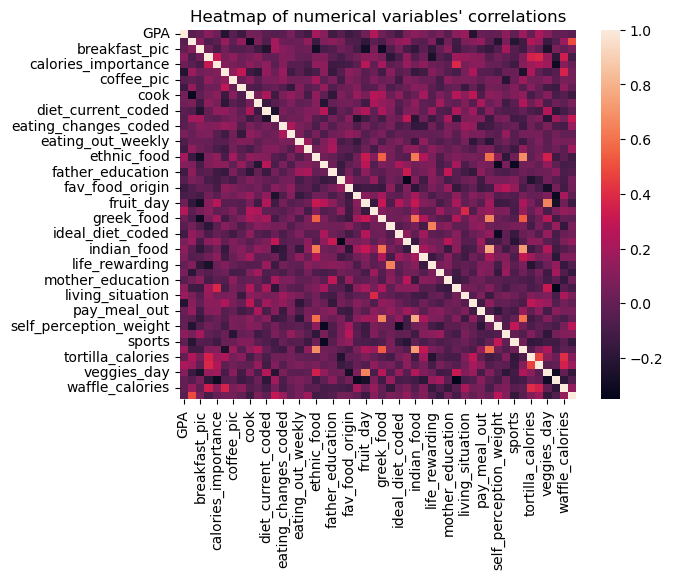

<Figure size 2000x2000 with 0 Axes>

In [162]:
corr_df = df.corr(numeric_only = True)
df.select_dtypes(include=np.number).columns.values
p1 = sns.heatmap(corr_df)
p1.set_title('Heatmap of numerical variables\' correlations')
plt.figure(figsize = (20, 20))

In [163]:
upper_corr_df = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))
pairs = upper_corr_df.unstack()
pairs = pairs.sort_values(ascending = False)
pairs[pairs > 0.6]

persian_food    indian_food        0.775315
thai_food       indian_food        0.727281
                ethnic_food        0.680881
persian_food    greek_food         0.661576
veggies_day     fruit_day          0.652544
life_rewarding  healthy_feeling    0.641791
indian_food     ethnic_food        0.621968
                greek_food         0.602709
dtype: float64

Text(0.5, 0, 'Likeliness to eat Persian food')

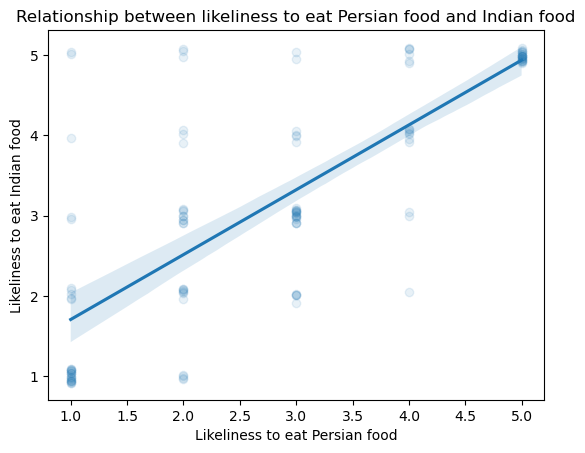

In [164]:
p2 = sns.regplot(x = df['persian_food'], y = df['indian_food'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)
p2.set_title('Relationship between likeliness to eat Persian food and Indian food')
p2.set_ylabel('Likeliness to eat Indian food')
p2.set_xlabel('Likeliness to eat Persian food')

<Axes: xlabel='thai_food', ylabel='indian_food'>

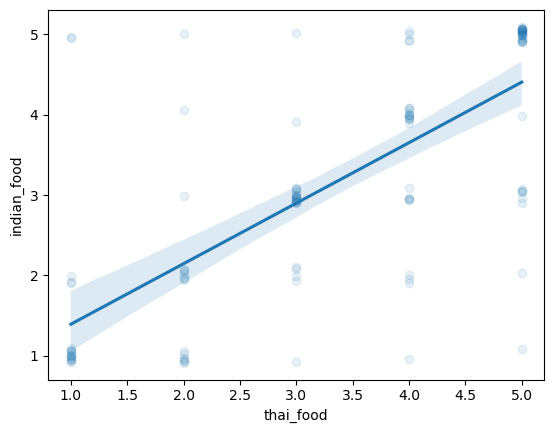

In [165]:
sns.regplot(x = df['thai_food'], y = df['indian_food'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='thai_food', ylabel='ethnic_food'>

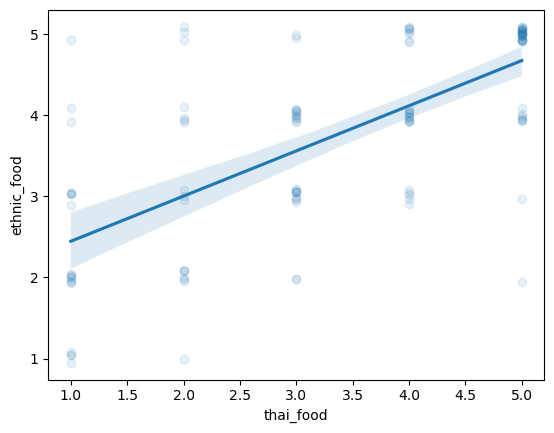

In [166]:
sns.regplot(x = df['thai_food'], y = df['ethnic_food'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='persian_food', ylabel='greek_food'>

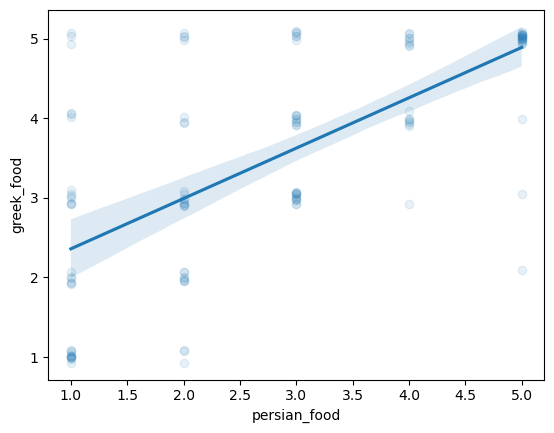

In [167]:
sns.regplot(x = df['persian_food'], y = df['greek_food'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='veggies_day', ylabel='fruit_day'>

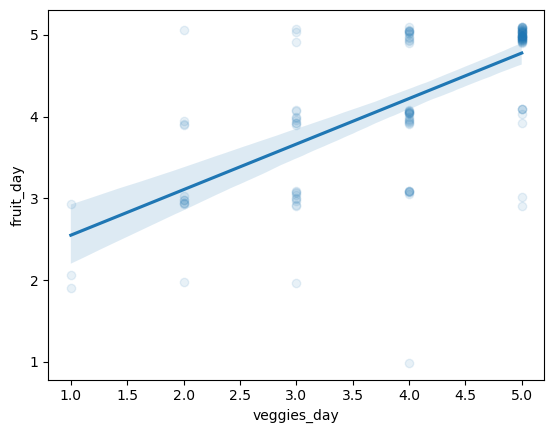

In [168]:
sns.regplot(x = df['veggies_day'], y = df['fruit_day'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='life_rewarding', ylabel='healthy_feeling'>

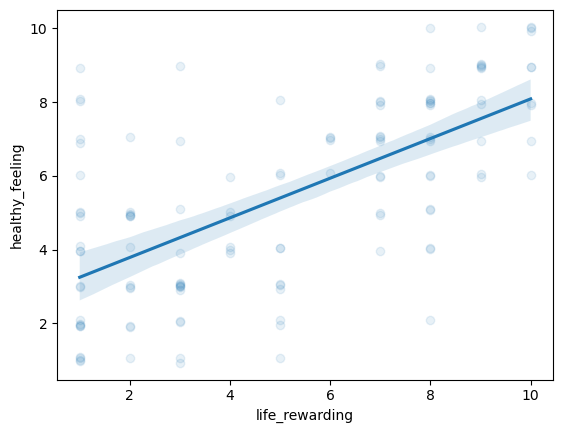

In [169]:
sns.regplot(x = df['life_rewarding'], y = df['healthy_feeling'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='indian_food', ylabel='ethnic_food'>

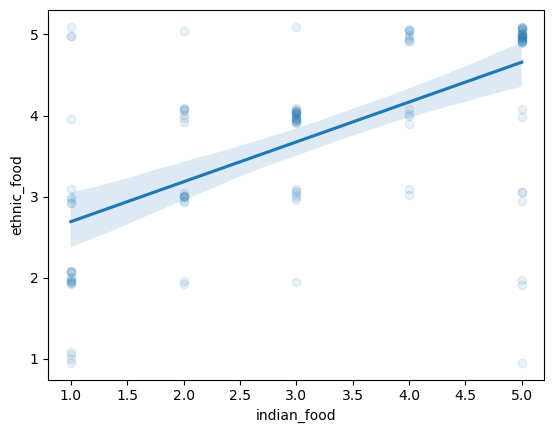

In [170]:
sns.regplot(x = df['indian_food'], y = df['ethnic_food'], scatter_kws = {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='indian_food', ylabel='greek_food'>

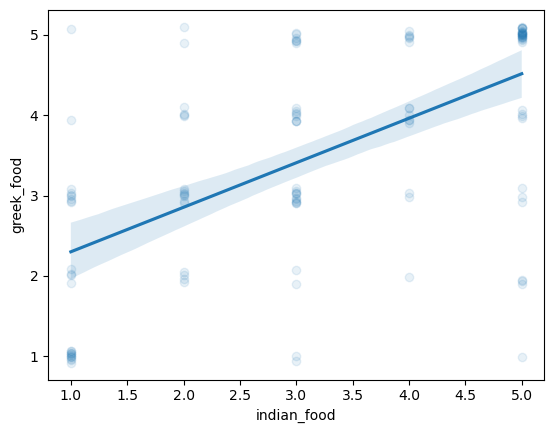

In [171]:
sns.regplot(x = df['indian_food'], y = df['greek_food'], scatter_kws= {'alpha': 0.1}, y_jitter = 0.1)

<Axes: xlabel='calories_chicken'>

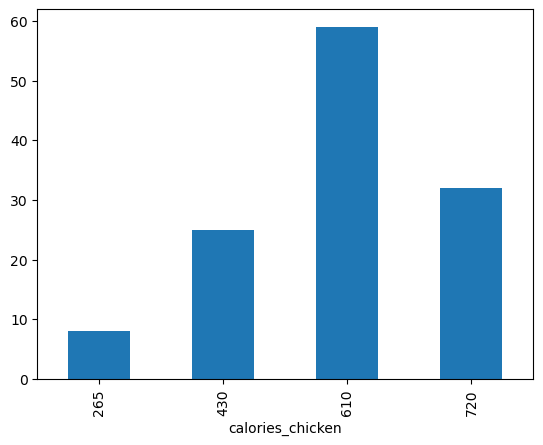

In [172]:
chicken = df['calories_chicken'].value_counts()
chicken = chicken.sort_index(ascending = True)
chicken.plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

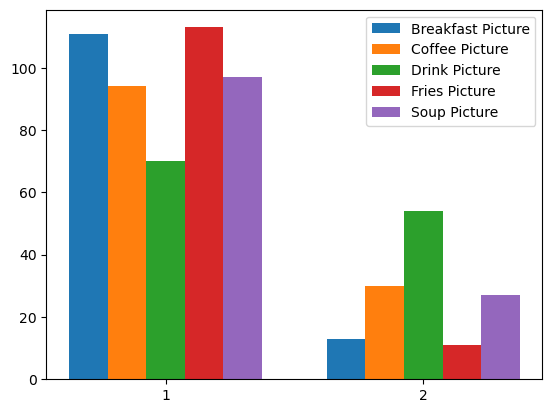

In [173]:
breakfast = df['breakfast_pic'].value_counts()
coffee = df['coffee_pic'].value_counts()
drink = df['drink_pic'].value_counts()
fries = df['fries_pic'].value_counts()
soup = df['soup_pic'].value_counts()
w = 0.15
x = np.arange(len(breakfast))
plt.bar(x - 2*w, breakfast, width = w, label = 'Breakfast Picture')
plt.bar(x - w, coffee, width = w, label = 'Coffee Picture')
plt.bar(x, drink, width = w, label = 'Drink Picture')
plt.bar(x + w, fries, width = w, label = 'Fries Picture')
plt.bar(x + 2*w, soup, width = w, label = 'Soup Picture')
plt.xticks(x, breakfast.index)
plt.legend()
plt.show

<Axes: xlabel='healthy_feeling', ylabel='GPA'>

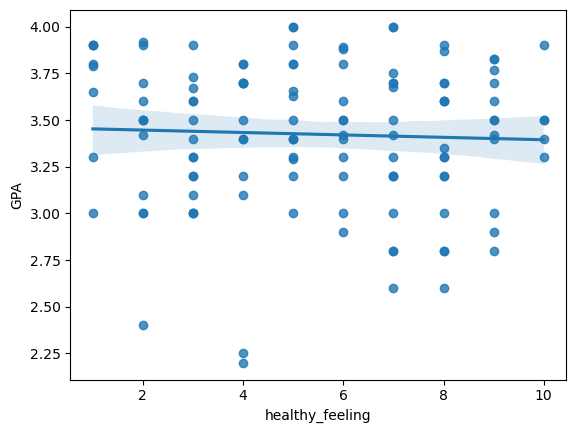

In [174]:
sns.regplot(x = df['healthy_feeling'], y = df['GPA'])

<Axes: xlabel='calories_importance', ylabel='GPA'>

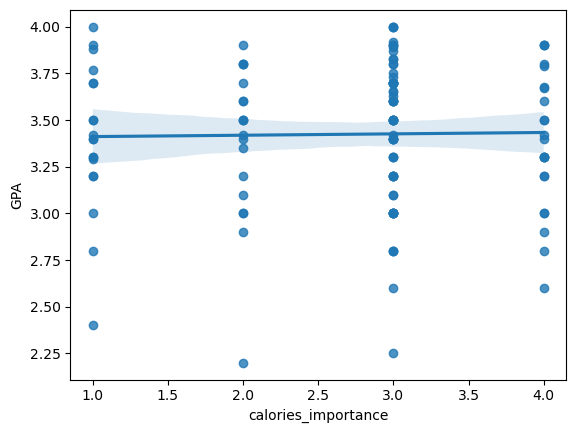

In [175]:
sns.regplot(x = df['calories_importance'], y = df['GPA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204c9f8d3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x204c9f8d9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204c9f8d130>],
 'medians': [<matplotlib.lines.Line2D at 0x204c9f8df40>],
 'fliers': [<matplotlib.lines.Line2D at 0x204c9f8e180>],
 'means': []}

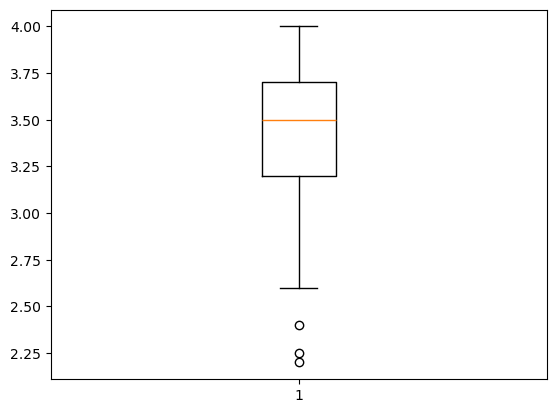

In [176]:
plt.boxplot(df['GPA'])

<Axes: xlabel='GPA', ylabel='Count'>

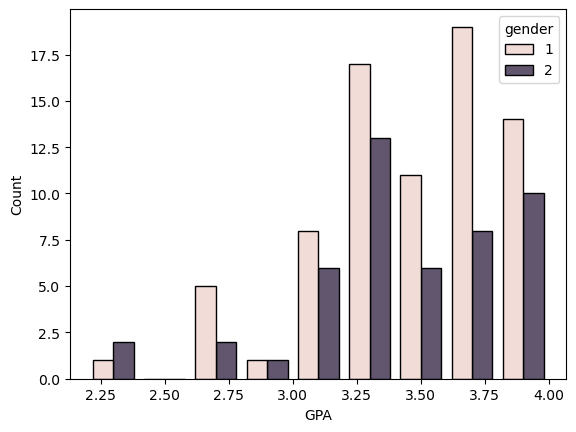

In [177]:
sns.histplot(data = df, x = 'GPA', hue = 'gender', multiple = 'dodge', shrink = 0.8)

<Axes: xlabel='gender'>

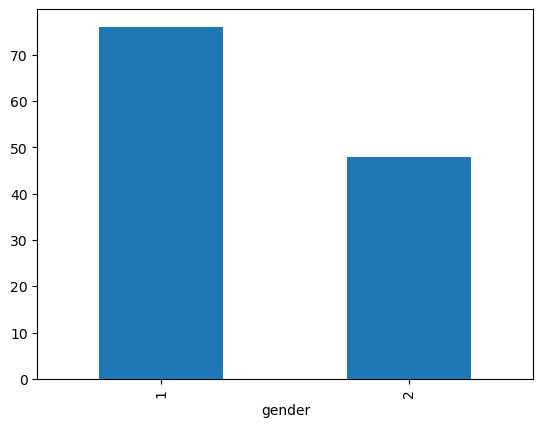

In [178]:
gender = df['gender'].value_counts()
gender.plot.bar()

<Axes: xlabel='calories_importance', ylabel='Count'>

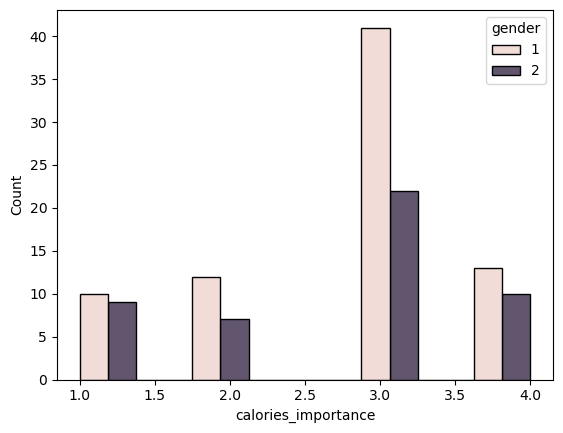

In [179]:
sns.histplot(data = df, x = 'calories_importance', hue = 'gender', multiple = 'dodge')

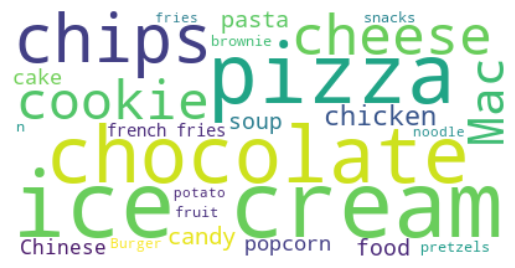

In [180]:
wordcloud = WordCloud(
    background_color = 'white',
    max_font_size = 100,
    min_font_size = 10,
).generate(' '.join(df['comfort_food']))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

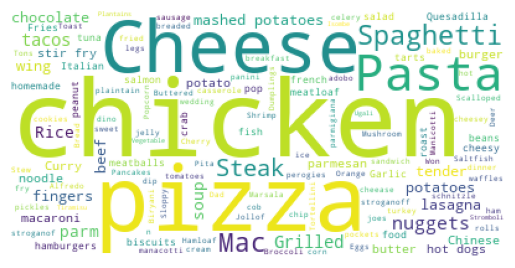

In [181]:
wordcloud2 = WordCloud(
    background_color = 'white'
).generate(' '.join(df['fav_food_childhood']))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

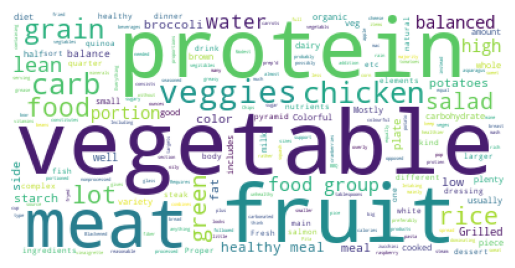

In [182]:
wordcloud3 = WordCloud(
    background_color = 'white'
).generate(' '.join(df['healthy_meal']))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

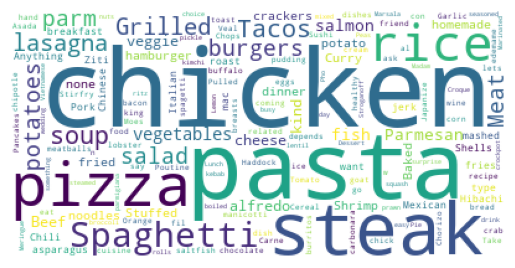

In [183]:
wordcloud4 = WordCloud(
    background_color = 'white'
).generate(' '.join(df['serve_friend_meal']))
plt.imshow(wordcloud4)
plt.axis('off')
plt.show()

<Axes: xlabel='weight', ylabel='Count'>

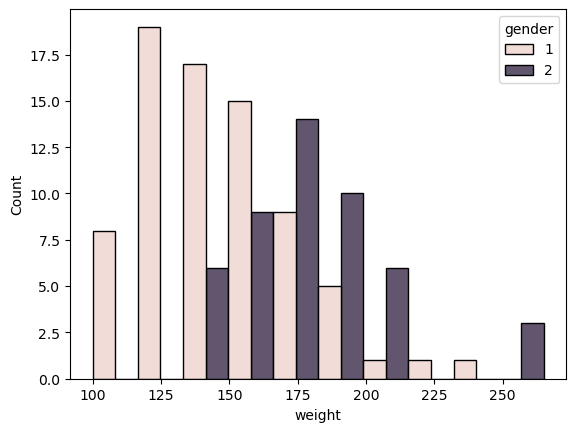

In [184]:
sns.histplot(data = df, x = 'weight', hue = 'gender', multiple = 'dodge')

<Axes: xlabel='calories_importance', ylabel='Count'>

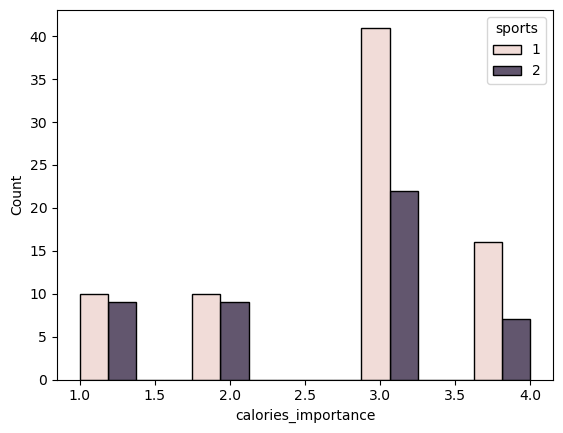

In [185]:
sns.histplot(data = df, x = 'calories_importance', hue = 'sports', multiple = 'dodge')